## Creation of working directories

__running time__: < 2 min

TADbit tools is designed to centralize the analysis of one experiment in a single file directory referred to as working directory. To maintain reproducibility and traceability the working directory contains a unified folder structure.

We will create out working directory inside the _results_ folder:

In [ ]:
%%bash

mkdir -p ../results

## Check restriction-enzyme used

One of the most important factor to analyze Hi-C datasets is the restriction enzyme used in the experiment. Although it should be known before conducting any analysis it is a good initial test to use TADbit to check for it and confirm that the restriction enzyme in the FASTQ files is what we expect from the experiment. We will use `tadbit map` with `CHECK` the `--renz` parameter.

In [1]:
%%bash

tadbit map -w ../results/PSC_rep1 \
    --fastq ../FASTQs/PSC/PSC_HiC_rep1_subset_chr3_1.fastq.gz \
    --read 1 \
    --index ../refGenome/mm39_chr3.gem \
    --renz CHECK


Searching for most probable restriction enzyme in file: ../FASTQs/PSC/PSC_HiC_rep1_subset_chr3_1.fastq.gz
 -> Most probable digested site: GATC (pv: 0.000000)
 -> Enzymes matching: BfuCI, Bsp143I, BssMI, BstMBI, DpnII, Kzo9I, MboI, NdeII, Sau3AI


TADbit uses the first 100000 reads to identify the most probable restriction enzyme used in the experiment. In our case the digested site found is GATC which corresponds to our expected MboI restriction enzyme.

## Hi-C quality check pre-mapping

In order to quickly assess the quality of the HiC experiment (before mapping), and given that we know the restriction enzyme used, we can check the proportion of reads with ligation sites as well as the number of reads starting by a cut-site.

These numbers will give us a first hint on the __efficiencies of two critical steps in the HiC experiment, the digestion and the ligation.__

We will use `tadbit map` again with the option `--skip_mapping` to generate quality plots based on the first 100000 reads:

In [5]:
%%bash

tadbit map -w ../results/PSC_rep1 \
    --fastq ../FASTQs/PSC/PSC_HiC_rep1_subset_chr3_1.fastq.gz \
    --read 1 \
    --index ../refGenome/mm39_chr3.gem \
    --renz MboI \
    --skip_mapping

Writing log to ../results/PSC_rep1/process.log
,-------.
| PATHs |
,----.-------.---------------------------------------------------------.--------------.
| Id | JOBid |                                                    Path |         Type |
|----+-------+---------------------------------------------------------+--------------|
|  1 |     1 |                /home/3DAROC21/3DAROC21/results/PSC_rep1 |      WORKDIR |
|  2 |     1 |    ../../FASTQs/PSC/PSC_HiC_rep1_subset_chr3_1.fastq.gz | MAPPED_FASTQ |
|  3 |     1 |                           ../../refGenome/mm39_chr3.gem |        INDEX |
|  4 |     1 | PSC_HiC_rep1_subset_chr3_1.fastq.gz_MboI_6389769ac5.png |       FIGURE |
'----^-------^---------------------------------------------------------^--------------'
,------.
| JOBs |
,----.----------------------------------------------------------------------------------------------------------------------------------------------------------------------------.---------------------.----------

Writing versions of TADbit and dependencies
Generating Hi-C QC plot
  - Dangling-ends (sensu-stricto): 1.340%
  - Ligation sites: 35.204%


The command has generated a plot inside the working directory as reported in the output. We will display the plot in the notebook:

In [6]:
%%bash

ls ../results/PSC_rep1/

PSC_HiC_rep1_subset_chr3_1.fastq.gz_MboI_6389769ac5.png
TADbit_and_dependencies_versions.log
process.log
trace.db


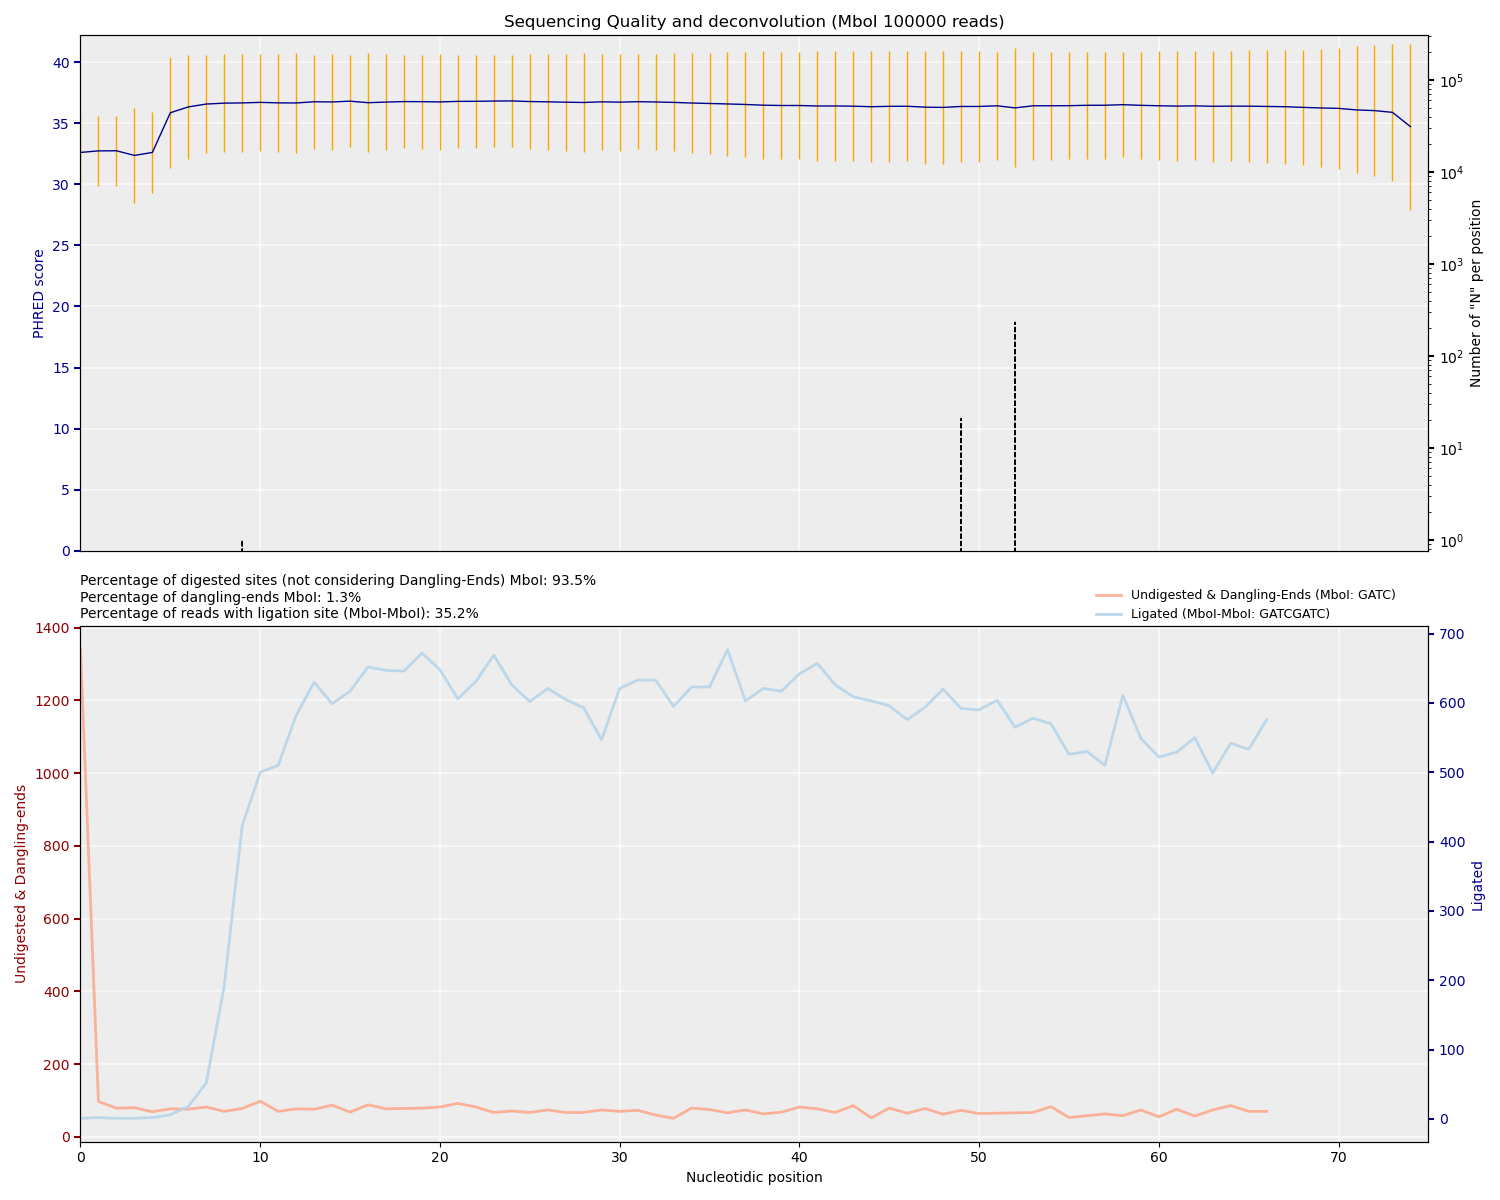

In [8]:
from IPython.display import Image
Image(filename='../results/PSC_rep1/PSC_HiC_rep1_subset_chr3_1.fastq.gz_MboI_6389769ac5.png') 

The plot on the top represents the typical per nucleotide quality profile of NGS reads, with, in addition, the proportion of `N` found at each position. 

The second plot, is specific to Hi-C experiments. Given a restriction enzyme the function searches for the presence of ligation sites and of undigested restriction enzyme sites. Depending on the enzyme used the function can differentiate between dangling-ends and undigested sites.

From these proportions some quality statistics can be inferred before mapping:
- The __PHRED score__ and the __number of unidentified nucleotides__ (Ns) in the read sequence, which are routinely computed to address the quality of high-throughput sequencing experiments.
- The numbers of __undigested and unligated RE sites per-nucleotide__ along the read to assess the quality of the Hi-C experiment.
- The overall __percentage of digested sites__, which relates directly to the RE efficiency.
- The __percentage of non-ligated digested__ (dangling-ends), which relates to the ligation efficiency.
- The __percentage of read-ends with a ligation site__, which is negatively correlated with the percentage of dangling-ends.

### Questions

- What is a restriction enzyme and what is his role in a Hi-C experiment?
- What is a digested site?
- In the bottom plot, why dangling-ends and undigested sites are plot with the same line? Will they be represented together in all Hi-C experiments?